# Overlay Chart

This guide demonstrates how to use the `OverlayChart` function to combine multiple chart types on a single plot with optional dual y-axes.

## Introduction

The `OverlayChart` function allows you to:

- Combine different chart types (LineChart, BarChart, ScatterChart, Histogram)
- Control drawing order (first chart drawn first, subsequent charts overlay)
- Use multiple y-axes (left and right) for different scales
- Automatically detect when secondary axis is needed
- Combine legends from all charts

In [1]:
import numpy as np
from datachart.charts import LineChart, BarChart, ScatterChart, Histogram
from datachart.utils import OverlayChart

## Example 1: Environmental Monitoring with Dual Measurements

A common use case in environmental science is overlaying different measurements that have different scales but are related, such as atmospheric CO₂ concentration and global temperature anomaly.

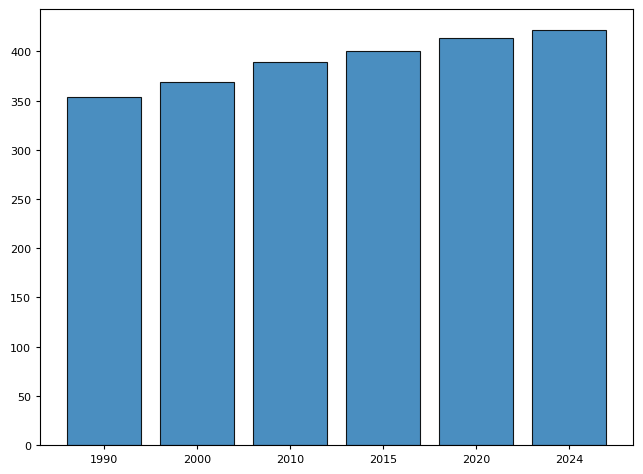

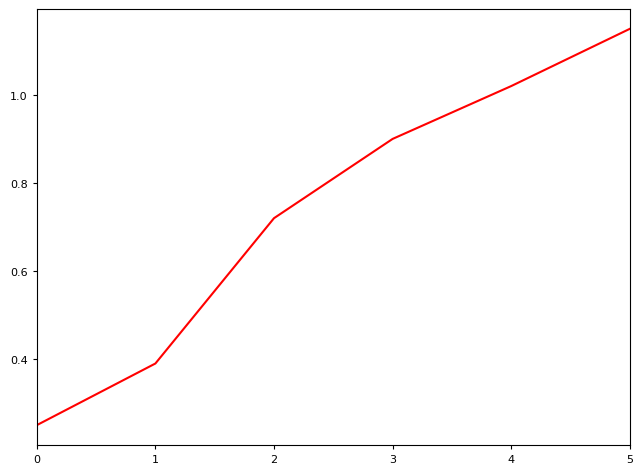

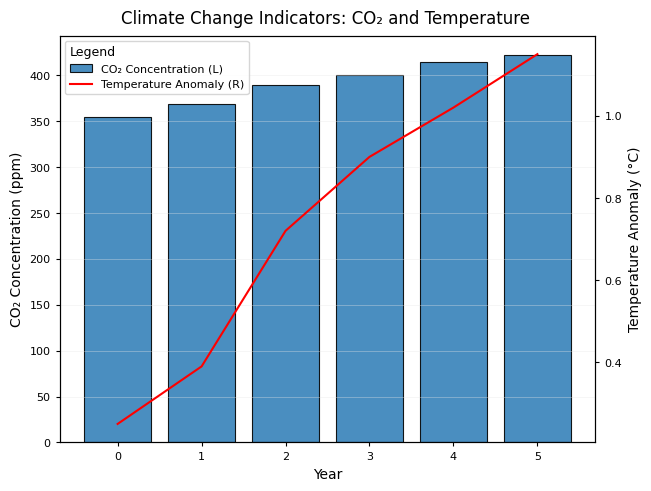

In [2]:
# Create bar chart for atmospheric CO₂ concentration (ppm)
# Simulating annual readings
co2_data = [
    {"label": "1990", "y": 354},
    {"label": "2000", "y": 369},
    {"label": "2010", "y": 389},
    {"label": "2015", "y": 400},
    {"label": "2020", "y": 414},
    {"label": "2024", "y": 422},
]
co2_fig = BarChart(data=co2_data, subtitle="CO₂ Concentration")

# Create line chart for temperature anomaly (°C) - different scale
temp_data = [
    {"x": 0, "y": 0.25},
    {"x": 1, "y": 0.39},
    {"x": 2, "y": 0.72},
    {"x": 3, "y": 0.90},
    {"x": 4, "y": 1.02},
    {"x": 5, "y": 1.15},
]
temp_fig = LineChart(data=temp_data, style={"plot_line_color": "red"}, subtitle="Temperature Anomaly")

# Combine with explicit axis assignment
combined_fig = OverlayChart(
    charts=[
        {"figure": co2_fig, "y_axis": "left"},
        {"figure": temp_fig, "y_axis": "right"},
    ],
    title="Climate Change Indicators: CO₂ and Temperature",
    xlabel="Year",
    ylabel_left="CO₂ Concentration (ppm)",
    ylabel_right="Temperature Anomaly (°C)",
    show_legend=True,
    show_grid="y",
)

## Example 2: Experimental Data with Theoretical Model (Single Axis)

In many experiments, we want to compare observed data points with a theoretical prediction or model to validate hypotheses.

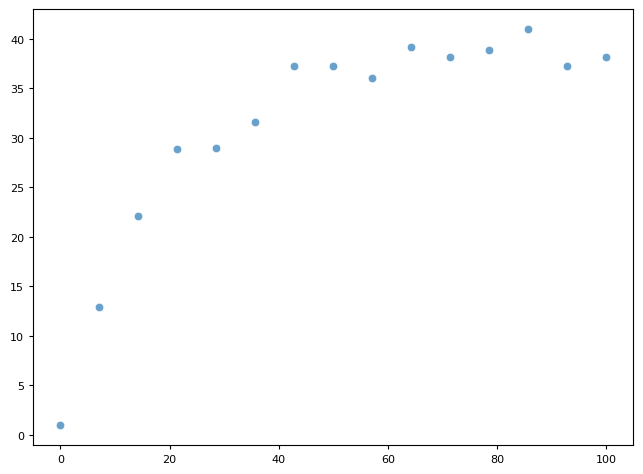

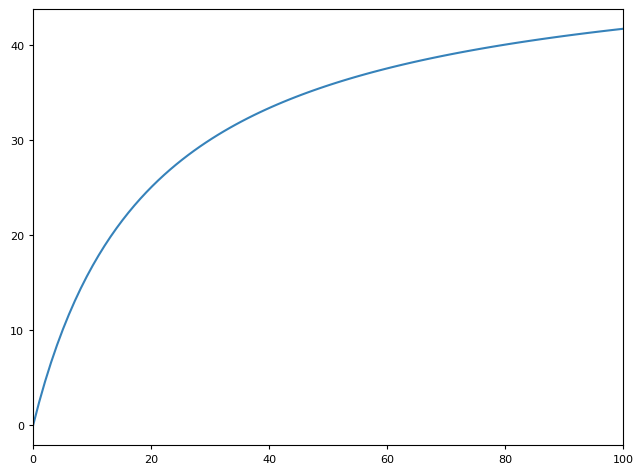

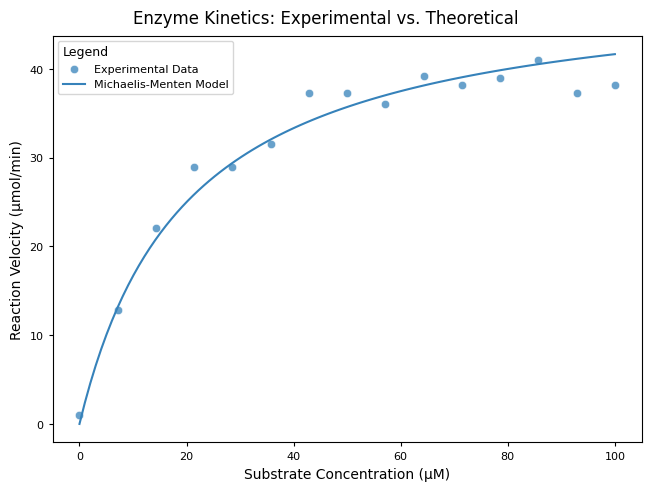

In [3]:
# Create experimental data with measurement noise
# Simulating enzyme kinetics (Michaelis-Menten)
np.random.seed(42)
substrate_conc = np.linspace(0, 100, 15)
# V = Vmax * [S] / (Km + [S]) with noise
Vmax, Km = 50, 20
observed_velocity = [Vmax * s / (Km + s) + np.random.randn() * 2 for s in substrate_conc]
scatter_data = [{"x": s, "y": v} for s, v in zip(substrate_conc, observed_velocity)]
scatter_fig = ScatterChart(data=scatter_data, subtitle="Experimental Data")

# Create theoretical Michaelis-Menten curve
theoretical_s = np.linspace(0, 100, 100)
theoretical_v = [Vmax * s / (Km + s) for s in theoretical_s]
line_data = [{"x": s, "y": v} for s, v in zip(theoretical_s, theoretical_v)]
line_fig = LineChart(data=line_data, subtitle="Michaelis-Menten Model")

# Combine on single axis (similar scales)
combined_fig = OverlayChart(
    charts=[
        {"figure": scatter_fig},
        {"figure": line_fig},
    ],
    title="Enzyme Kinetics: Experimental vs. Theoretical",
    xlabel="Substrate Concentration (μM)",
    ylabel_left="Reaction Velocity (μmol/min)",
    show_legend=True,
)

## Example 3: Distribution Analysis with Theoretical Curve

Overlay a theoretical distribution curve on a histogram to assess if experimental data follows expected patterns.

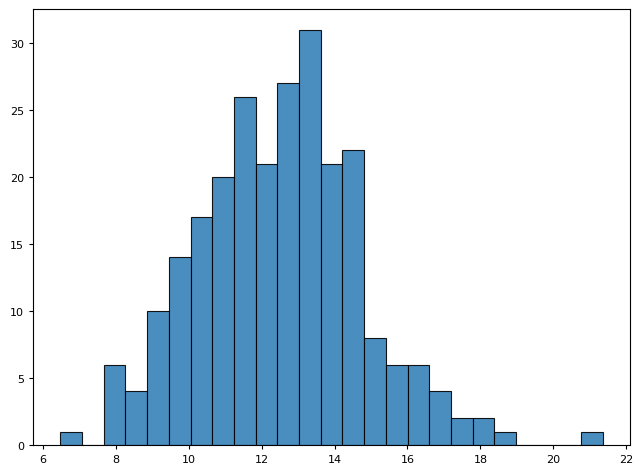

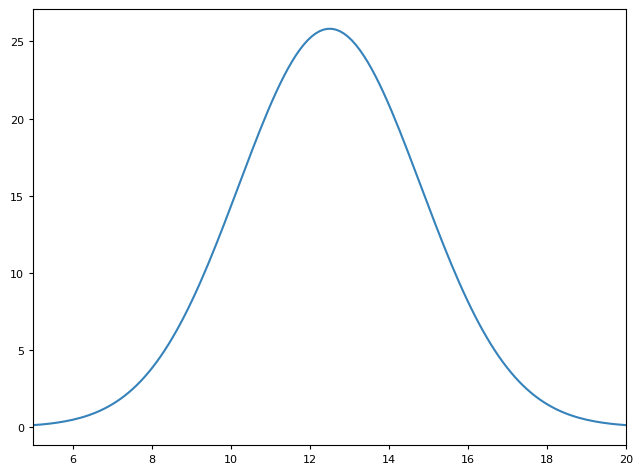

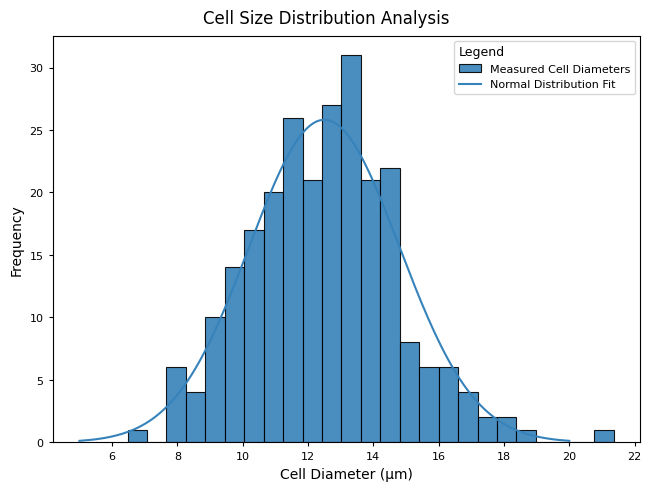

In [4]:
# Create histogram of particle sizes from microscopy
# Simulating cell diameter measurements (μm)
np.random.seed(42)
mean_diameter, std_diameter = 12.5, 2.3
measurements = np.random.normal(mean_diameter, std_diameter, 250)
hist_data = [{"x": x} for x in measurements]
hist_fig = Histogram(data=hist_data, num_bins=25, subtitle="Measured Cell Diameters")

# Create normal distribution curve for comparison
x_vals = np.linspace(5, 20, 150)
# Scale to match histogram (N * bin_width / sqrt(2*pi*sigma^2))
bin_width = (measurements.max() - measurements.min()) / 25
y_vals = (len(measurements) * bin_width / (std_diameter * np.sqrt(2 * np.pi))) * \
         np.exp(-0.5 * ((x_vals - mean_diameter) / std_diameter)**2)
line_data = [{"x": x, "y": y} for x, y in zip(x_vals, y_vals)]
line_fig = LineChart(data=line_data, subtitle="Normal Distribution Fit")

# Combine
combined_fig = OverlayChart(
    charts=[
        {"figure": hist_fig, "y_axis": "left"},
        {"figure": line_fig, "y_axis": "left"},
    ],
    title="Cell Size Distribution Analysis",
    xlabel="Cell Diameter (μm)",
    ylabel_left="Frequency",
    show_legend=True,
)

## Example 4: Pharmacokinetics - Drug Concentration and Efficacy

Demonstrate automatic secondary axis detection when comparing drug concentration with therapeutic efficacy.

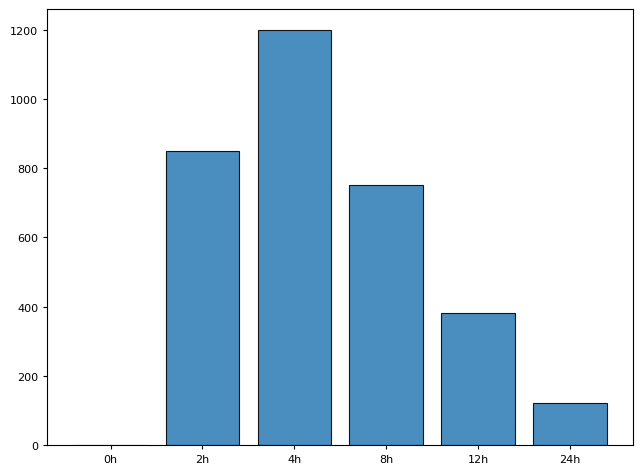

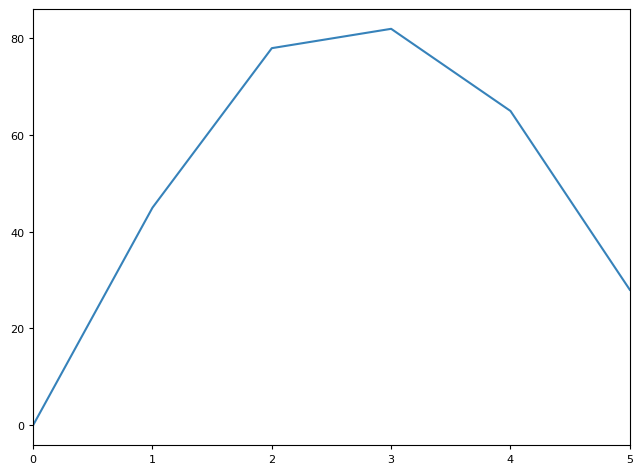

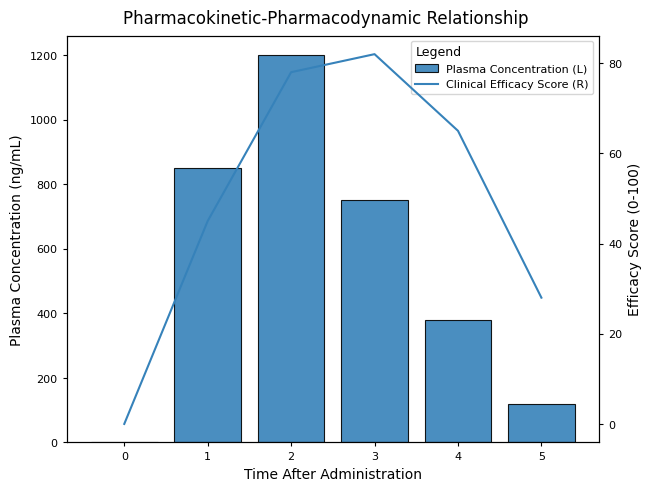

In [5]:
# Create plasma concentration over time (ng/mL) - large values
time_points = ["0h", "2h", "4h", "8h", "12h", "24h"]
concentration_data = [{"label": time_points[i], "y": v} for i, v in enumerate([0, 850, 1200, 750, 380, 120])]
conc_fig = BarChart(data=concentration_data, subtitle="Plasma Concentration")

# Create efficacy score (0-100 scale) - small values
efficacy_data = [{"x": i, "y": v} for i, v in enumerate([0, 45, 78, 82, 65, 28])]
efficacy_fig = LineChart(data=efficacy_data, subtitle="Clinical Efficacy Score")

# Use auto mode - will detect scale difference and create secondary axis
combined_fig = OverlayChart(
    charts=[
        {"figure": conc_fig},  # auto
        {"figure": efficacy_fig},  # auto
    ],
    title="Pharmacokinetic-Pharmacodynamic Relationship",
    xlabel="Time After Administration",
    ylabel_left="Plasma Concentration (ng/mL)",
    ylabel_right="Efficacy Score (0-100)",
    auto_secondary_axis=3.0,  # threshold: if ratio > 3, use secondary axis
    show_legend=True,
)

## Example 5: Multi-Treatment Comparison with Z-Order Control

Control the drawing order when comparing multiple experimental treatments to ensure important data is visible.

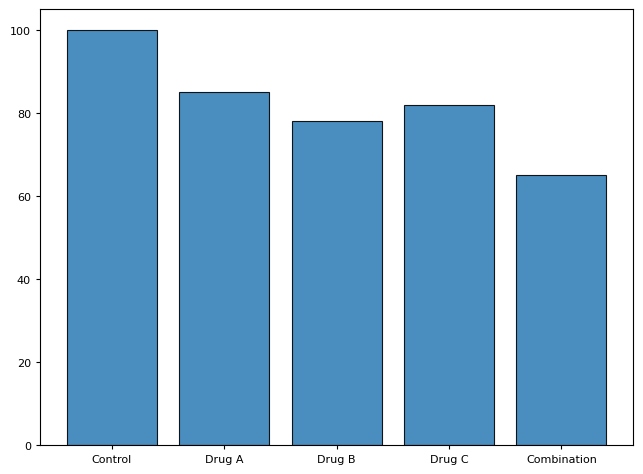

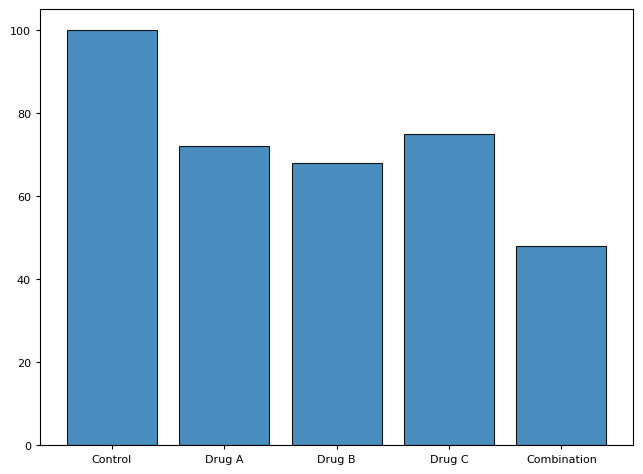

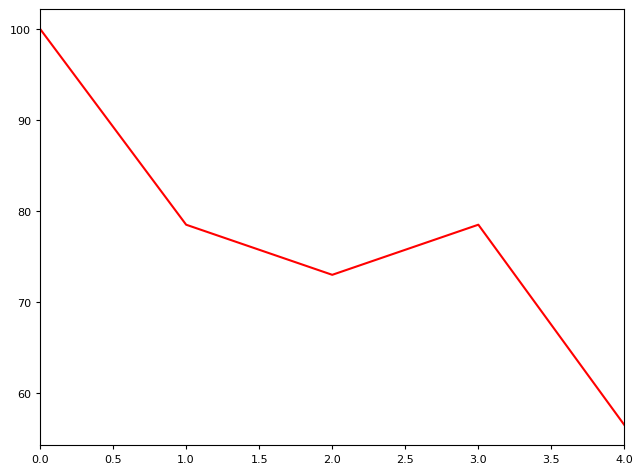

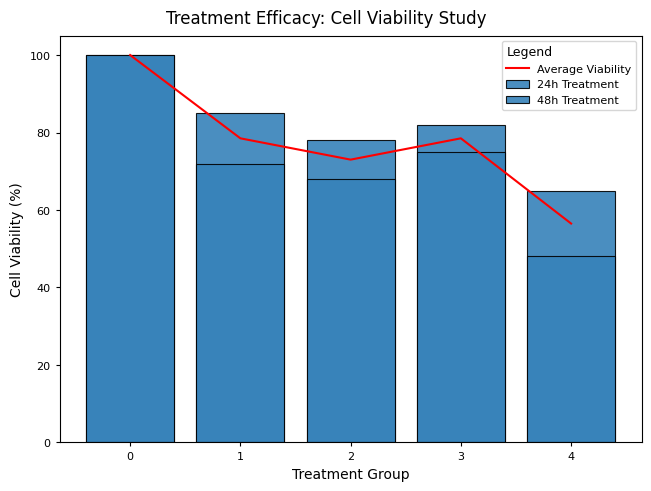

In [6]:
# Create bar charts for different treatment groups
# Cell viability under different conditions
conditions = ["Control", "Drug A", "Drug B", "Drug C", "Combination"]
control_data = [{"label": conditions[i], "y": v} for i, v in enumerate([100, 85, 78, 82, 65])]
control_fig = BarChart(data=control_data, subtitle="24h Treatment", style={"color": "#95a5a6"})

repeat_data = [{"label": conditions[i], "y": v} for i, v in enumerate([100, 72, 68, 75, 48])]
repeat_fig = BarChart(data=repeat_data, subtitle="48h Treatment", style={"color": "#7f8c8d"})

# Create average trend line
avg_data = [{"x": i, "y": (control_data[i]["y"] + repeat_data[i]["y"]) / 2} for i in range(len(conditions))]
avg_fig = LineChart(data=avg_data, subtitle="Average Viability", style={"plot_line_color": "red", "linewidth": 2.5})

# Combine with explicit z-order
combined_fig = OverlayChart(
    charts=[
        {"figure": control_fig, "z_order": 1},  # drawn first (background)
        {"figure": repeat_fig, "z_order": 1},   # drawn second
        {"figure": avg_fig, "z_order": 2},      # drawn last (foreground)
    ],
    title="Treatment Efficacy: Cell Viability Study",
    xlabel="Treatment Group",
    ylabel_left="Cell Viability (%)",
    show_legend=True,
)

## Example 6: Highlighting Anomalous Events with Background Theme

Use the `BACKGROUND` theme to de-emphasize baseline data while highlighting specific events or periods of interest, such as seismic events or outlier measurements.

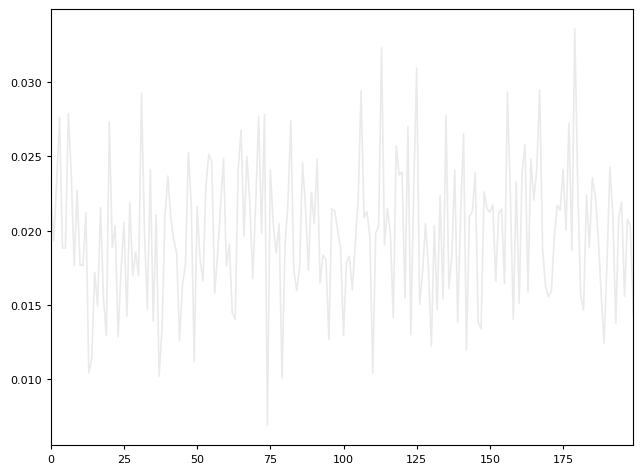

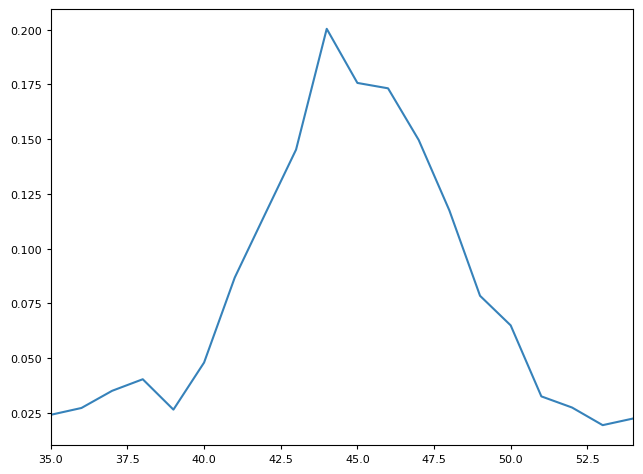

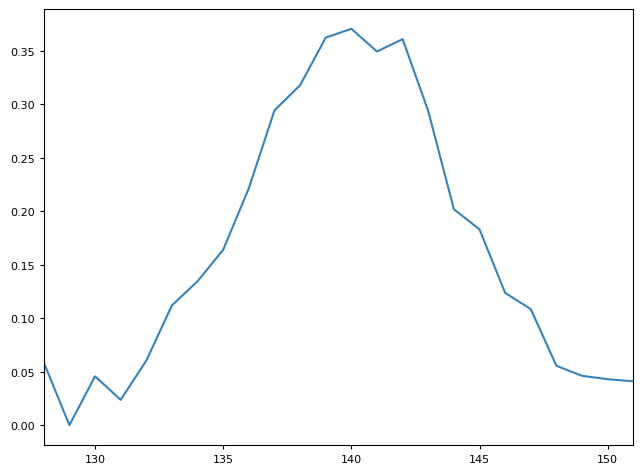

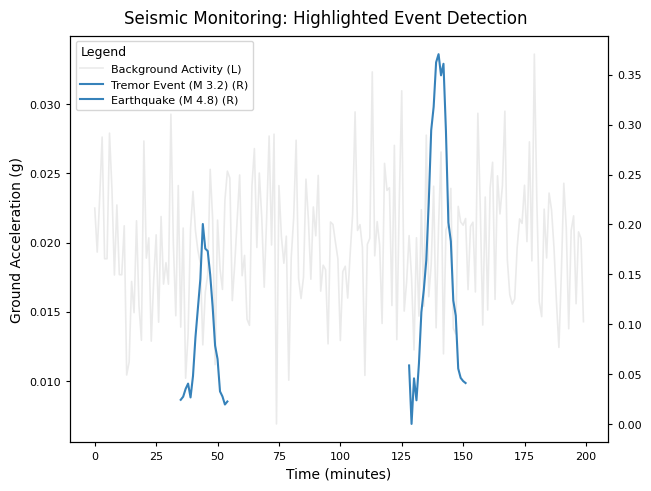

In [7]:
from datachart.charts import LineChart
from datachart.utils import OverlayChart
from datachart.config import config
from datachart.constants import THEME

# Create baseline seismic activity (background)
# Simulating ground acceleration data
np.random.seed(42)
baseline_data = [{"x": x, "y": 0.02 + np.random.randn() * 0.005} for x in range(200)]

# Set the background theme
config.set_theme(THEME.BACKGROUND)
baseline_fig = LineChart(
    data=baseline_data,
    subtitle="Background Activity"
)


# Set the default theme for the rest of the charts
config.set_theme(THEME.DEFAULT)

# Create two seismic events with different themes
# Event 1: Minor tremor
event1_data = [{"x": x, "y": 0.02 + 0.15 * np.exp(-0.5 * ((x - 45) / 3)**2) + np.random.randn() * 0.01}
               for x in range(35, 55)]

event1_fig = LineChart(
    data=event1_data,
    subtitle="Tremor Event (M 3.2)",
    style={"color": "#F39C12"}  # Orange for moderate event
)

# Event 2: Larger seismic event
event2_data = [{"x": x, "y": 0.02 + 0.35 * np.exp(-0.5 * ((x - 140) / 4)**2) + np.random.randn() * 0.015}
               for x in range(128, 152)]
event2_fig = LineChart(
    data=event2_data,
    subtitle="Earthquake (M 4.8)",
    style={"color": "#E74C3C"}  # Red for emphasis
)

# Overlay with proper z-ordering
combined = OverlayChart(
    charts=[
        {"figure": baseline_fig, "z_order": 1},
        {"figure": event1_fig, "z_order": 2},
        {"figure": event2_fig, "z_order": 2},
    ],
    title="Seismic Monitoring: Highlighted Event Detection",
    xlabel="Time (minutes)",
    ylabel_left="Ground Acceleration (g)",
    show_legend=True
)

## Configuration Options

The overlay behavior can be customized using configuration options:

In [9]:
from datachart.config import config

# Adjust overlay settings
config.update_config({
    "overlay_auto_threshold": 2.5,  # More sensitive auto axis detection
    "overlay_bar_alpha": 0.6,       # More transparent bars when overlaying
    "overlay_hist_alpha": 0.5,      # More transparent histograms
    "overlay_default_zorder_bar": 1,
    "overlay_default_zorder_line": 2,
    "overlay_default_zorder_scatter": 2,
    "overlay_default_zorder_hist": 1,
})

## Function Parameters

The `OverlayChart` function accepts the following parameters:

- `charts`: List of chart configuration dictionaries, each containing:
  - `figure`: A matplotlib Figure from datachart chart functions (required)
  - `y_axis`: "left", "right", or "auto" (default: "auto")
  - `z_order`: Integer for layering control (optional)
- `title`: Title for the combined chart
- `xlabel`: Label for x-axis
- `ylabel_left`: Label for left y-axis
- `ylabel_right`: Label for right y-axis (if using dual axes)
- `figsize`: Size of the figure (width, height) in inches
- `show_legend`: Whether to show the legend (default: True)
- `show_grid`: Which grid lines to show ("x", "y", "both", or None)
- `auto_secondary_axis`: Threshold ratio for automatic secondary axis creation (default: 3.0)

## Best Practices

1. **Axis Assignment**: Use explicit `y_axis` assignment when you know the data scales differ significantly
2. **Z-Order**: Set `z_order` to control layering - bars and histograms typically have lower values (background)
3. **Legends**: Use `subtitle` parameter in individual charts to create meaningful legend labels
4. **Colors**: Colors are automatically assigned from the theme's color cycle
5. **Transparency**: When overlaying multiple bars or histograms, transparency is automatically applied
6. **Grid**: Use `show_grid="y"` for better readability with horizontal comparisons